In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import datetime 
pd.set_option('precision', 5)
from pandas_datareader import data
%matplotlib inline
from matplotlib import style
import plotly
import cufflinks as cf
cf.go_offline()
style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore")

In [10]:
pepsi = data.DataReader('PEP','yahoo', start = '2017-01-01', end = '2017-12-31')
pepsi.to_csv('Pepsi.csv')

### Getting candlestick charts

In [17]:
pepsi = pd.read_csv('Pepsi.csv',index_col =0, parse_dates=True)
pepsi = pepsi.reset_index('Date')

In [18]:
# Convert Date to another format as Date_Num to make it readable for the candlestick_ohlc function
pepsi['Date_Num'] = pepsi['Date'] \
.apply(lambda date: mdates.date2num(date.to_pydatetime()))

In [20]:
#the candlestick_ohlc function with DataFrame objects, so we must convert our data to another format with tuples 
subset_as_tuples = [tuple(x) for x in pepsi[['Date_Num','Open','High','Low','Close']].values]

In [25]:
from matplotlib.dates import DateFormatter
from matplotlib.finance import candlestick_ohlc

In [22]:
week_formatter = DateFormatter('%b %d')

In [23]:
from matplotlib.dates import (WeekdayLocator, MONDAY)
mondays = WeekdayLocator(MONDAY)

In [27]:
pepsi = pepsi.set_index('Date')

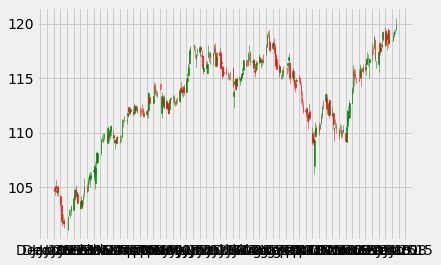

In [50]:
plt.figure(figsize=(14,8))
fig, ax = plt.subplots()
ax.xaxis.set_major_locator(mondays)
ax.xaxis.set_major_formatter(week_formatter)
candlestick_ohlc(ax, subset_as_tuples, width=0.6, colorup='g',colordown='r')
plt.show()

In [52]:
doc_pepper = data.DataReader("DPS", 'yahoo')

In [53]:
doc_pepper[['Open', 'High', 'Low', 'Close']].loc['2016-1-2' :'2017-12-30' ].iplot(kind='candle')

### Calculating daily pct return

In [54]:
#Percentage change with 3 days shifting back    .shift(3)  3 days shift - forward
daily_pct_change = pepsi["Adj Close"].pct_change().shift(-3)

In [55]:
# filling all Nan with 0 value
daily_pct_change.fillna(0, inplace=True)

### Calculating simple daily cumulative returns

In [56]:
cum_daily_return = (1 + daily_pct_change).cumprod()
cum_daily_return.head()

Date
2017-01-03    0.99857
2017-01-04    0.98806
2017-01-05    0.97383
2017-01-06    0.97230
2017-01-09    0.97259
Name: Adj Close, dtype: float64

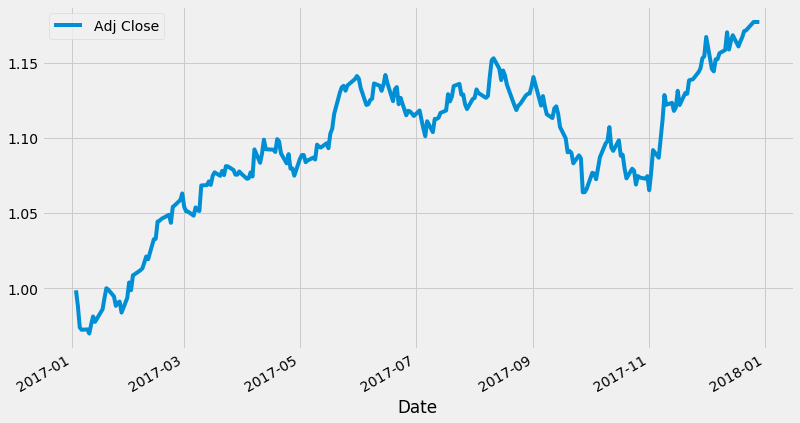

In [58]:
cum_daily_return.plot(figsize=(12,7))
plt.legend(loc=2);

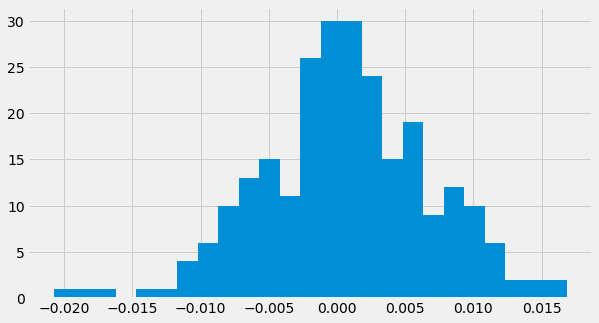

In [60]:
pepsi = daily_pct_change
pepsi.hist(bins=25, figsize=(9,5));

In [61]:
pepsi.describe(percentiles=[0.025, 0.5, 0.75])

count    251.00000
mean       0.00067
std        0.00613
min       -0.02073
2.5%      -0.01068
50%        0.00070
75%        0.00476
max        0.01683
Name: Adj Close, dtype: float64

In [63]:
pepsi.describe(percentiles=[0.025, 0.5, 0.75])

count    251.00000
mean       0.00067
std        0.00613
min       -0.02073
2.5%      -0.01068
50%        0.00070
75%        0.00476
max        0.01683
Name: Adj Close, dtype: float64

### Quantile-Quantile plot

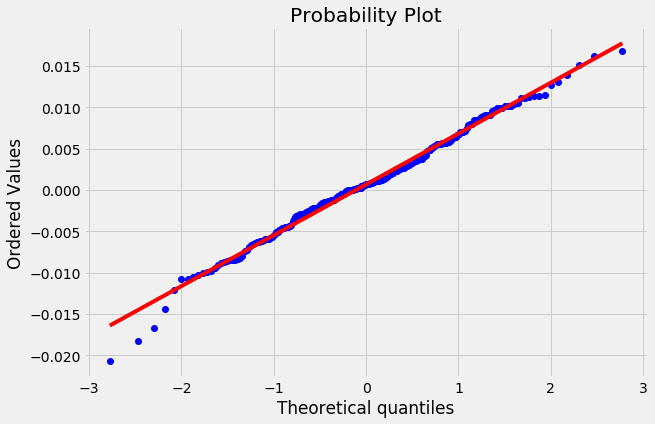

In [64]:
#Quantile-Quantile plot, is a probability plot comparing two
#probability distributions by plotting their quantiles against each other. We can use a
#Q-Q plot of the returns of a stock compared to a normal distribution to get a feel of
#how close our returns are to a normal distribution.

import scipy.stats as stats
f = plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
stats.probplot(pepsi, dist='norm', plot=ax)
plt.show()

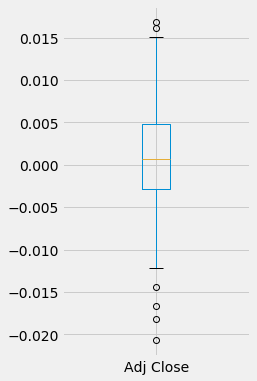

In [66]:
daily_pct_change.plot(kind='box', figsize=(3,6));

### Comparison of daily percentage change between stocks

In [67]:
start =datetime.datetime(2016,1,2)
end = datetime.datetime(2016,12,30)

In [68]:
PEP = data.DataReader('PEP','yahoo',start,end)
KO = data.DataReader('KO','yahoo',start,end)
DPS = data.DataReader('DPS','yahoo',start,end)
WTR = data.DataReader('WTR','yahoo',start,end)

In [69]:
tickers = ['PEP','KO','DPS','WTR']

In [70]:
beverages = pd.concat([PEP,KO,DPS,WTR], axis = 1, keys = tickers)

In [71]:
beverages.head(3)

PEP                                             KO         \
             Open   High    Low  Close Adj Close   Volume   Open   High   
Date                                                                      
2016-01-04  98.56  99.00  97.80  98.77  92.65364  6689000  42.34  42.50   
2016-01-05  98.81  99.85  98.71  99.45  93.29152  4893800  42.31  42.63   
2016-01-06  98.38  99.76  98.12  99.48  93.31966  5483400  42.20  42.51   

                           ...       DPS                              WTR  \
              Low  Close   ...       Low  Close Adj Close   Volume   Open   
Date                       ...                                              
2016-01-04  41.97  42.40   ...     91.08  92.23  87.45027  1484200  29.79   
2016-01-05  42.17  42.55   ...     92.37  93.37  88.53119  1241400  29.47   
2016-01-06  42.04  42.32   ...     92.41  94.50  89.60264  2904900  29.46   

                                                    
             High    Low  Close Adj Close   Volume  
Date                                                
2016-01-04  29.94  29.23  29.47  27.93083  1225800  
2016-01-05  29.73  29.15  29.65  28.10142   885000  
2016-01-06  29.70  29.37  29.68  28.12986   589200  

[3 rows x 24 columns]

In [73]:
for tick in tickers:
    print(tick,beverages[tick]['Adj Close'].head().pct_change())   

PEP Date
2016-01-04        NaN
2016-01-05    0.00688
2016-01-06    0.00030
2016-01-07   -0.01920
2016-01-08   -0.00369
Name: Adj Close, dtype: float64
KO Date
2016-01-04        NaN
2016-01-05    0.00354
2016-01-06   -0.00541
2016-01-07   -0.01654
2016-01-08   -0.00264
Name: Adj Close, dtype: float64
DPS Date
2016-01-04        NaN
2016-01-05    0.01236
2016-01-06    0.01210
2016-01-07   -0.01280
2016-01-08   -0.00890
Name: Adj Close, dtype: float64
WTR Date
2016-01-04        NaN
2016-01-05    0.00611
2016-01-06    0.00101
2016-01-07   -0.02089
2016-01-08    0.00585
Name: Adj Close, dtype: float64


In [75]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick + '_Return'] = beverages[tick]['Adj Close'].pct_change()

In [76]:
returns.dropna().head()

PEP_Return  KO_Return  DPS_Return  WTR_Return
Date                                                     
2016-01-05     0.00688    0.00354     0.01236     0.00611
2016-01-06     0.00030   -0.00541     0.01210     0.00101
2016-01-07    -0.01920   -0.01654    -0.01280    -0.02089
2016-01-08    -0.00369   -0.00264    -0.00890     0.00585
2016-01-11     0.00237    0.00169     0.00151     0.00718

In [81]:
sns.set_style('darkgrid')
def render_scatter_plot(data, x_stock_name, y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: 
        ax.set_xlim(xlim)
        ax.autoscale(False)
        ax.vlines(0, -10, 10)
        ax.hlines(0, -10, 10)
        ax.plot((-10, 10), (-10, 10),color = 'r',alpha = 0.7)
        ax.set_title('Pepsi v. Coca-Cola 2016 Return')
        ax.set_xlabel(x_stock_name)
        ax.set_ylabel(y_stock_name)

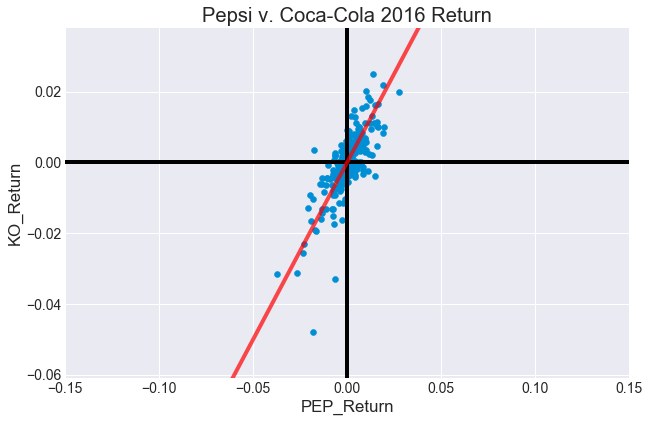

In [82]:
limits = [-0.15, 0.15]
render_scatter_plot(returns, 'PEP_Return', 'KO_Return', xlim=limits)

In [83]:
sns.set_style('whitegrid')
def scatter_plot(data, x_stock_name, y_stock_name, xlim=None, ylim=None):
    fig = plt.figure(figsize=(9,6))
    ax = fig.add_subplot(111)
    ax.scatter(data[x_stock_name], data[y_stock_name])
    if xlim is not None: 
        ax.set_xlim(xlim)
        ax.autoscale(False)
        ax.vlines(0, -10, 10)
        ax.hlines(0, -10, 10)
        ax.plot((-10, 10), (-10, 10),color = 'r',alpha = 1.1)
        ax.set_title('Dr.Pepper v. Aqua 2016 Return')
        ax.set_xlabel(x_stock_name)
        ax.set_ylabel(y_stock_name)

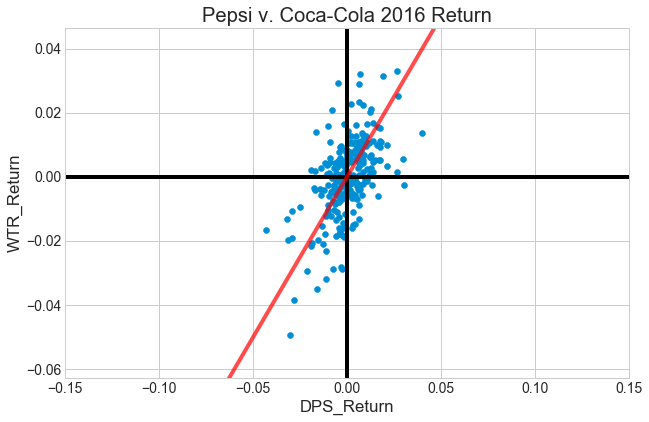

In [84]:
render_scatter_plot(returns, 'DPS_Return', 'WTR_Return', xlim=limits)

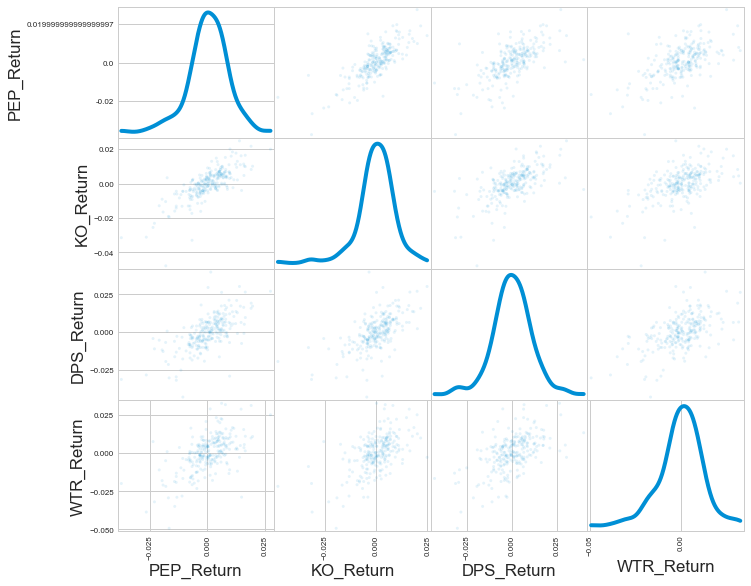

In [90]:
kde = pd.plotting.scatter_matrix(returns, diagonal='kde', alpha=0.1,
figsize=(10,9))

In [92]:
### Rolling Windows Options 

"""
Function 
-----------------------------------------------------------------
rolling_mean  This is the mean of the values in the window
rolling_std   This is the standard deviation of the values in the
window
rolling_var   This is the variance of values
rolling_min   This is the minimum of the values in the window
rolling_max   This is maximum of the values in the window
rolling_cov   This is the covariance of values
rolling_quantile This is the moving window score at the percentile/
sample quantile
rolling_corr  This is the correlation of the values in the window
rolling_median This is the median of the values in the window
rolling_sum   This is the sum of the values in the window
rolling_apply This is the application of a user function to the values
in the window
rolling_count This is the number of non-NaN values in a window
rolling_skew  This is the skewedness of the values in the window
rolling_kurt  This is the kurtosis of the values in the window
"""

'\nFunction \n-----------------------------------------------------------------\nrolling_mean  This is the mean of the values in the window\nrolling_std   This is the standard deviation of the values in the\nwindow\nrolling_var   This is the variance of values\nrolling_min   This is the minimum of the values in the window\nrolling_max   This is maximum of the values in the window\nrolling_cov   This is the covariance of values\nrolling_quantile This is the moving window score at the percentile/\nsample quantile\nrolling_corr  This is the correlation of the values in the window\nrolling_median This is the median of the values in the window\nrolling_sum   This is the sum of the values in the window\nrolling_apply This is the application of a user function to the values\nin the window\nrolling_count This is the number of non-NaN values in a window\nrolling_skew  This is the skewedness of the values in the window\nrolling_kurt  This is the kurtosis of the values in the window\n'

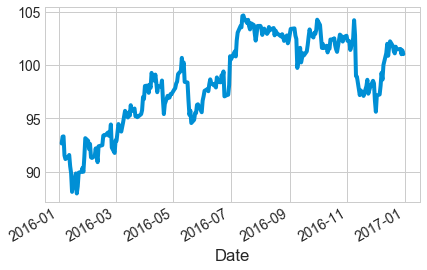

In [94]:
PEP['Adj Close'].plot();

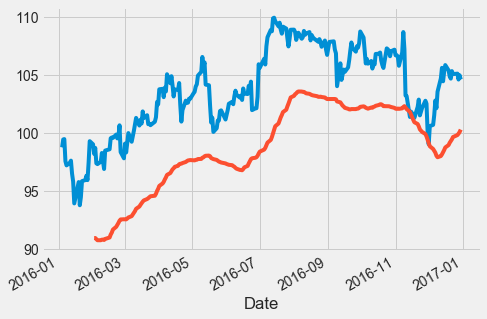

In [101]:
# Moving Averages with 100 day Close period
PEP['Close'].plot()
pd.rolling_mean(PEP['Adj Close'], 21).plot(figsize=(7,5));

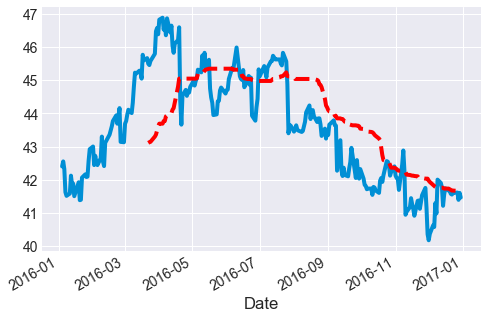

In [102]:
sns.set_style('darkgrid')
KO['Close'].plot()
pd.rolling_median(KO['Close'], 55).plot(figsize=(7,5), color = 'r', ls = '--')

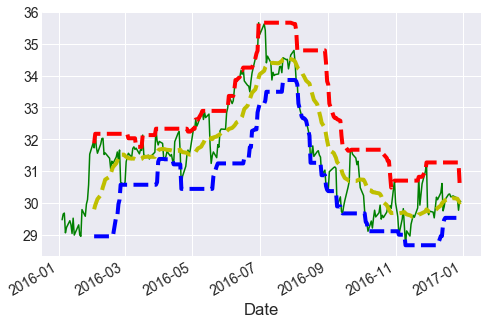

In [104]:
WTR['Close'].plot(color = 'g', lw = 1.5)
pd.rolling_max(WTR['Close'], 21).plot(figsize=(7,5), color = 'r', ls = '--')
pd.rolling_min(WTR['Close'], 21).plot(figsize=(7,5), color = 'b', ls ='--')
pd.rolling_mean(WTR['Close'], 21).plot(figsize=(7,5), color = 'y',ls = '--');

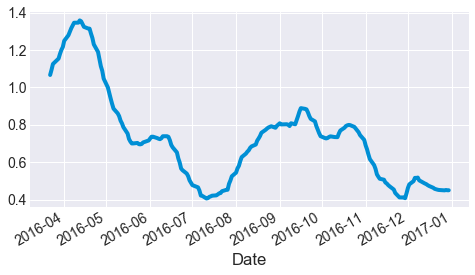

In [105]:
#To demonstrate this, the following command calculates the mean average deviation,
#which gives a feel of how far on average all the values in the sample are from theoverall mean:
mean_abs_dev = lambda x: np.fabs(x - x.mean()).mean()
pd.rolling_apply(KO['Close'], 55, mean_abs_dev).plot(figsize=(7,4));

###  Volatility calculation

In [106]:
"""
The volatility of a stock is a measurement of the change in variance in the returns
of a stock over a specific period of time. It is common to compare the volatility of
a stock with another stock to get a feel for which may have less risk or to a market
index to examine the stock's volatility in the overall market. Generally, the higher the
volatility, the riskier the investment in that stock, which results in investing in one
over another.
Volatility is calculated by taking a rolling window standard deviation on the
percentage change in a stock. The size of the window affects the overall result. The
wider the window, the less representative the measurement will become. As the
window narrows, the result approaches the standard deviation.
"""

"\nThe volatility of a stock is a measurement of the change in variance in the returns\nof a stock over a specific period of time. It is common to compare the volatility of\na stock with another stock to get a feel for which may have less risk or to a market\nindex to examine the stock's volatility in the overall market. Generally, the higher the\nvolatility, the riskier the investment in that stock, which results in investing in one\nover another.\nVolatility is calculated by taking a rolling window standard deviation on the\npercentage change in a stock. The size of the window affects the overall result. The\nwider the window, the less representative the measurement will become. As the\nwindow narrows, the result approaches the standard deviation.\n"

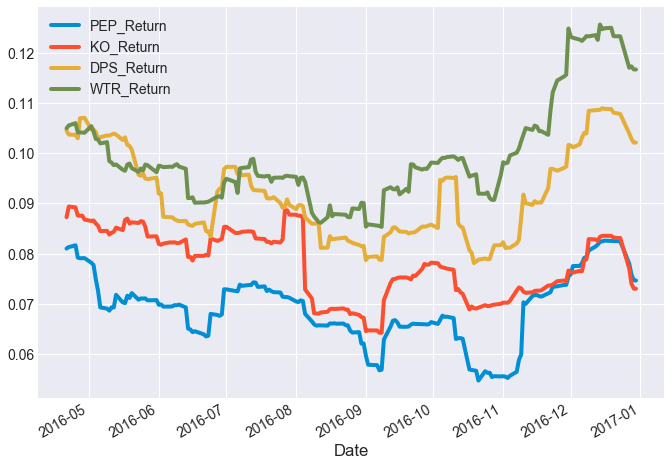

In [108]:
min_periods = 75  # 75 window days   !!! the more day value the less precise data for volatility std. data
vol = pd.rolling_std(returns, min_periods) * \
np.sqrt(min_periods)
vol.plot(figsize=(10, 8));

###  Rolling correlation of returns

In [109]:
#performed using rolling windows to demonstrate how the correlation has changed over time
#!!! first 251 data will be NaN
rolling_corr = pd.rolling_corr(WTR.Close, PEP.Close, window=252).dropna()
rolling_corr 

Date
2016-12-30    0.29932
Name: Close, dtype: float64

### Comparing stocks to the Dow Jones 

In [128]:
start = datetime.datetime(2016, 1, 2)
end = datetime.datetime(2016, 12, 30)
dj = data.DataReader("^DJI", 'yahoo', start, end)

In [129]:
dj_ = dj['Adj Close'].pct_change().fillna(0)

In [130]:
dj_.head()

Date
2016-01-04    0.00000
2016-01-05    0.00057
2016-01-06   -0.01470
2016-01-07   -0.02321
2016-01-08   -0.01015
Name: Adj Close, dtype: float64

In [131]:
con = pd.concat([dj_, returns], axis=1)
con.rename(columns={'Adj Close': 'DJI'}, inplace=True)

In [132]:
#Now, we calculate the cumulative daily returns with the following command:
cdr = (1 + con).cumprod()
cdr.dropna().head(2)

DJI  PEP_Return  KO_Return  DPS_Return  WTR_Return
Date                                                              
2016-01-05  1.00057     1.00688    1.00354     1.01236     1.00611
2016-01-06  0.98586     1.00719    0.99811     1.02461     1.00713

In [133]:
# Calculating the correlation
correlat = cdr.corr()
correlat

DJI  PEP_Return  KO_Return  DPS_Return  WTR_Return
DJI         1.00000     0.76241    0.00649     0.06617     0.06136
PEP_Return  0.76241     1.00000    0.23586     0.38485     0.30030
KO_Return   0.00649     0.23586    1.00000     0.45031     0.71389
DPS_Return  0.06617     0.38485    0.45031     1.00000     0.72272
WTR_Return  0.06136     0.30030    0.71389     0.72272     1.00000

In [134]:
correlat.ix['DJI']

DJI           1.00000
PEP_Return    0.76241
KO_Return     0.00649
DPS_Return    0.06617
WTR_Return    0.06136
Name: DJI, dtype: float64

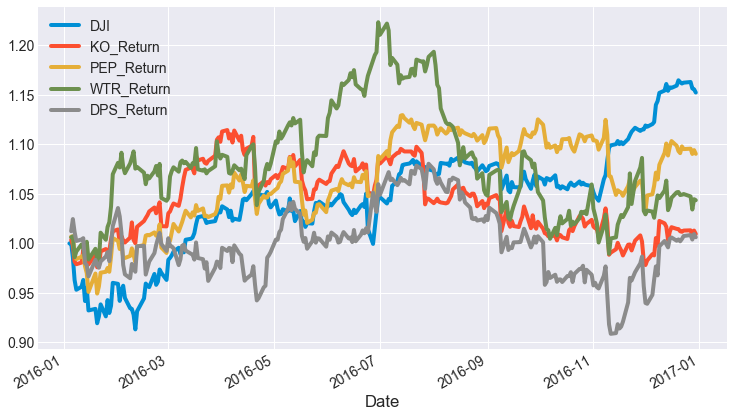

In [135]:
# The chart displays that DJI outperfomed the beverage stocks in 2016 in average
better_return_analysis = cdr[['DJI', 'KO_Return', 'PEP_Return','WTR_Return','DPS_Return']].plot(figsize=(11,7))

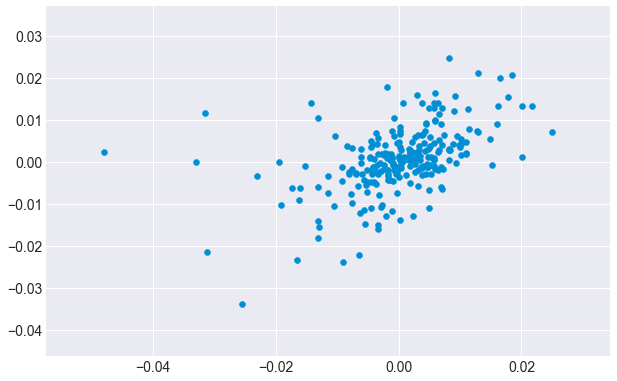

In [136]:
render_scatter_plot(con, 'KO_Return', 'DJI')
#plt.savefig('5104_05_23.png', bbox_inches='tight', dpi=300)